Setup and get Data

1.1 Install dependencies and Setup 
> labelme 

> tensorflow 

> tensorflow-gpu 

> open cv

> python 

> matplotlib 

> Albumentations (for data augmenetation)

1.2. Colllected images using OpenCV 

In [1]:
import os 
import time 
import uuid
import cv2

In [2]:
#uuid allows us to create a uniform unique identifier to create unique files names for our images 
uuid.uuid1() 

UUID('b74999a3-c680-11ed-a55d-a8934a84f126')

In [3]:
IMG_PATH = os.path.join('data' ,'images')
number_images = 30 

In [5]:
# # Establish a line to webcame 
# cam_num= 0
# cap = cv2.VideoCapture(cam_num) # camera number 
# for imgnum in range (number_images): 
#     print('collecting images {}'. format(imgnum))
#     ret , frame = cap.read()
#     imgname = os.path.join(IMG_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname , frame )
#     cv2.imshow('frame' , frame )
#     time.sleep (0.5)

# #Break out of the loop 

#     if cv2.waitKey(1) & 0xFF == ord('q'): 
#         break
# cap.release()
# cv2.destroyAllWindows()

1.3 Annoatate images with LabelMe

In [6]:
# !labelme

`Review Dataset and build image loading function `

2.1 Import Tensorflow and Dependencies



In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import json 

2.2 Limit GPU memory growth 


In [8]:
#Avoid Out Of Memory  errors by setting GPU mememroy consumption growth 

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu , True)

In [9]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2.3 Load images into tf data pipeline

In [ ]:
images  = tf.data.Dataset.list_files(r"data\images\*.jpg" , shuffle = False)
images.as_numpy_iterator().next()


In [11]:
def load_images(x): 
    img = tf.io.read_file(x) # returns a byte encoded images
    images = tf.io.decode_jpeg(img) # decoded a btye encoded images
    return images

In [12]:
# images = images.map(load_images)

In [13]:
# images.as_numpy_iterator().next()

In [14]:
# type(images )


2.4. View Raw images with matplotlib 

In [15]:
# import glob 

# all_files = glob.glob(r"data\images\*.jpg")
# all_files[1]

In [16]:
# import matplotlib.image as mping 


# img = mping.imread(all_files[1])
# plt.imshow(img)


In [17]:
# # Make a batchof all the images
# image_generator = images.batch(8).as_numpy_iterator()
# plot_images = image_generator.next()

In [18]:
# fig ,ax = plt.subplots(ncols = 8 , figsize =( 30,20 ))
# for i, v in enumerate (plot_images): 
#     ax[i].imshow(v)
# plt.show()

`Parition Unaugemented Data `

In [19]:
import glob 

In [29]:
len(glob.glob(r"C:\Users\thibe\OneDrive\Desktop\Object Detection\data\train\images\*.jpg"))

84

In [30]:
120*.7 # to train 
18 # to test 
18 # to val 

18

In [31]:
import random 
import shutil 

3.1 split data into train/test/val

In [33]:
# p = 17
# for i in range(18):
#     j = random.randint(0,p)
#     shutil.move(glob.glob(r"C:\Users\thibe\OneDrive\Desktop\Object Detection\data\images\*.jpg")[j], r"C:\Users\thibe\OneDrive\Desktop\Object Detection\val\images")
#     p -=1 
    

In [34]:
len(glob.glob(r"C:\Users\thibe\OneDrive\Desktop\Object Detection\data\test\images\*.jpg"))

18

In [35]:
len(glob.glob(r"C:\Users\thibe\OneDrive\Desktop\Object Detection\data\val\images\*.jpg"))

18

In [36]:
len(glob.glob(r"C:\Users\thibe\OneDrive\Desktop\Object Detection\train\images\*.jpg"))

0

3.2 Move the matching labels 

In [37]:
# # Move the matching labels from the data files to the repsective train/test/val folders 
# for folder in ["train" , "test" , "val"]: 
#     for file in os.listdir(os.path.join ("data", folder , "images")): 
        
#         filename = file.split(".")[0] + '.json'
#         exisiing_filepath = os.path.join("data", "labels" , filename)
        
#         if os.path.exists(exisiing_filepath): 
#             new_filepath = os.path.join("data", folder, "labels" , filename )
            
#             os.replace(exisiing_filepath , new_filepath )

`Apply image augmentaiton on images and labels using albumneatations`

4.1 Setup Albumentations transfomr pipeline 

In [38]:
import albumentations as alb

In [39]:
# define our augmentation pipelien 

augmentor = alb.Compose([alb.RandomCrop(width = 450, height = 450), alb.HorizontalFlip(p = 0.5) , alb.RandomBrightnessContrast(p=0.2) , alb.RandomGamma(p = 0.2), alb.RGBShift(p = 0.2 ), alb.VerticalFlip(p = 0.5)], 
bbox_params= alb.BboxParams(format = "albumentations" , label_fields = ["class_labels"]))

4.2 Load a test image and annotaiton with opencv and json 

In [40]:
img_example = cv2.imread(r"C:\Users\thibe\OneDrive\Desktop\Object Detection\data\test\images\9a383af5-5b7e-11ed-8987-e070eaca4136.jpg")
img_example.shape

(480, 640, 3)

In [41]:
with open(r'C:\Users\thibe\OneDrive\Desktop\Object Detection\data\test\labels\9a383af5-5b7e-11ed-8987-e070eaca4136.json' , 'r') as f: 
    label = json.load(f)

In [42]:
label["shapes"][0]["points"][0][0]

262.3076923076923

4.3 Extract coordinates and rescale to match imgae resolution 

In [43]:
coords = [0,0,0,0]
coords[0] =label["shapes"][0]["points"][0][0]
coords[1] =label["shapes"][0]["points"][0][1]
coords[2]= label["shapes"][0]["points"][1][0]
coords[3] =label["shapes"][0]["points"][1][1]

In [44]:
coords

[262.3076923076923, 28.205128205128204, 457.69230769230774, 285.64102564102564]

In [45]:
#normalize the coords 
coords = list(np.divide(coords , [640,480,640,480]))

4.4 Apply Augmentation and view results

In [46]:
augmented = augmentor(image = img_example, bboxes = [coords] , class_labels = ["face"])

In [47]:
augmented

{'image': array([[[ 68,  44,  38],
         [ 63,  39,  33],
         [ 58,  37,  30],
         ...,
         [200, 177, 176],
         [200, 177, 176],
         [200, 179, 176]],
 
        [[ 62,  39,  30],
         [ 57,  37,  27],
         [ 57,  36,  29],
         ...,
         [199, 178, 175],
         [200, 177, 176],
         [200, 179, 176]],
 
        [[ 55,  33,  22],
         [ 55,  35,  24],
         [ 58,  38,  28],
         ...,
         [198, 177, 174],
         [199, 178, 175],
         [200, 179, 176]],
 
        ...,
 
        [[175, 153, 136],
         [175, 152, 137],
         [173, 149, 137],
         ...,
         [122, 120, 114],
         [122, 120, 114],
         [123, 121, 115]],
 
        [[175, 153, 136],
         [175, 152, 137],
         [176, 152, 140],
         ...,
         [122, 122, 116],
         [125, 122, 118],
         [124, 121, 117]],
 
        [[176, 153, 138],
         [175, 151, 139],
         [174, 150, 139],
         ...,
         [125, 123,

In [48]:
augmented["bboxes"]

[(0.15401709401709396,
  0.4141310541310541,
  0.5882051282051282,
  0.9862108262108262)]

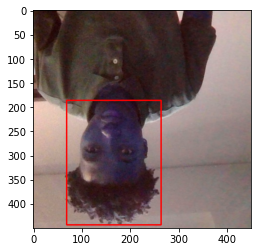

In [49]:
#plot the augmented pictures 

cv2.rectangle(augmented["image"] , 
tuple(np.multiply(augmented["bboxes"][0][:2], [450,450]).astype(int)), # top coordinate , rescale , make as an int => pass it as a tuple 
tuple(np.multiply(augmented["bboxes"][0][2:],[450,450]).astype(int)), #bottom coordiante , rescale , make as an int => pass it as a tuple 
(255,0,0), 2 )# BGR formate and thinkness of rectangle 

plt.imshow(augmented["image"])

`Build and Run augmentation pipeline`

6.1 Build label loading function 

In [52]:
for segment in ["train" , "test" , "val" ]:
    for image in os.listdir (os.path.join('data' , segment , "images")): 
        img = cv2.imread(os.path.join("data", segment , "images" , image)) 


        coords = [0,0,0.00001,0.00001] #Assign these coordnnates for images that do not have our face in it

        label_path = (os.path.join("data", segment, "labels" , image.split(".")[0] + ".json"))
        if os.path.exists(label_path): 
            with open ( label_path, "r") as f : 
                label = json.load(f)
        
            coords[0] = label["shapes"][0]["points"][0][0]
            coords[1] = label["shapes"][0]["points"][0][1]
            coords[2] = label["shapes"][0]["points"][1][0]
            coords[3] = label["shapes"][0]["points"][1][1]

            coords= list(np.divide(coords, [640,480,640,480]))# normalize the coordinates

            try: 
                for x in range(60): # We will create 60 augmented images for 1 image 
                    augmented  = augmentor(image = img , bboxes = [coords] , class_labels = ["face"])
                    cv2.imwrite(os.path.join("aug_data" , segment ,"images" , f'{image.split(".")[0]}.{x}.jpg') , augmented["image"]) # wirte the augmented images onot the existing images

                    annotations = {}
                    annotations["image"] = image

                    if os.path.exists(label_path): 
                        if augmented["bboxes"] == 0 : # if there is no box in an image
                            annotations["bbox"] = [0,0,0,0] # box 
                            annotations["class"] = 0 # 0 class means that there is not face in the image
                        else: 
                            annotations['bbox'] = augmented["bboxes"] # if there is a face 
                            annotations['class'] = 1 
                    else: 
                        annotations["bbox"] = [0,0,0,0]
                        annotations["class"] = 0

                    with open(os.path.join("aug_data" , segment , "labels" ,  f'{image.split(".")[0]}.{x}.json') , "w") as f: 
                        json.dump(annotations , f )

            except Exception as e:  
                print(e)        


In [53]:
 
train_images = tf.data.Dataset.list_files(glob.glob(os.path.join(r"aug_data\train\images\*.jpg")) ,shuffle=False)
train_images = train_images.map(load_images)
train_images = train_images.map( lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)


In [54]:

test_images = tf.data.Dataset.list_files(glob.glob(os.path.join(r"aug_data\test\images\*.jpg")) ,shuffle=False)
test_images = test_images.map(load_images)
test_images = test_images.map( lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)



In [55]:
val_images = tf.data.Dataset.list_files(glob.glob(os.path.join(r"aug_data\val\images\*.jpg")) ,shuffle=False)
val_images = val_images.map(load_images)
val_images = val_images.map( lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [56]:
train_images.as_numpy_iterator().next().shape

(120, 120, 3)

6.2 Load labels to tensorflow dataset

In [57]:
def load_labels(label_path): 
    with open(label_path.numpy() , 'r', encoding = "utf-8") as f: 
        label = json.load(f)
    
    return [label["class"]] , label["bbox"]

In [243]:
# Put labels into tf.data.Dataset
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [244]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [245]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [246]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([[0.291 , 0.329 , 0.6377, 0.7725]], dtype=float16))

`Combine Lable and Image samples`

7.1 check partion lenghts 

In [250]:
len(train_images) , len(train_labels) , len(test_images) , len(test_labels) , len(val_images) , len(val_labels)

(4260, 4260, 960, 960, 1020, 1020)

7.2 Create final dataset (images/lables)

In [251]:
train = tf.data.Dataset.zip((train_images , train_labels)) # combining the images and labels
train= train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4) #shuffle the dataset, then have 8 images and labels per patch, then prefetch 4 images and labels to avoid bottleneck

In [252]:
test = tf.data.Dataset.zip((test_images , test_labels))
test = test.shuffle(1000)
test = test.batch(8)
test = test.prefetch(4)

In [253]:
val = tf.data.Dataset.zip((val_images , val_labels))
val = val.shuffle(1300)
val= val.batch(8)
val = val.prefetch(4)

In [66]:
test

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, None), dtype=tf.float32, name=None), (TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None)))>

In [67]:
train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, None), dtype=tf.float32, name=None), (TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.float16, name=None)))>

In [254]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[[0.612  , 0.2976 , 1.     , 0.8438 ]],
 
        [[0.9897 , 0.2402 , 1.     , 0.5093 ]],
 
        [[0.2388 , 0.07983, 0.7104 , 0.7485 ]],
 
        [[0.5107 , 0.3333 , 0.7173 , 0.626  ]],
 
        [[0.4253 , 0.26   , 0.675  , 0.544  ]],
 
        [[0.     , 0.2908 , 0.3884 , 0.985  ]],
 
        [[0.504  , 0.562  , 0.784  , 0.944  ]],
 
        [[0.4246 , 0.1528 , 0.823  , 0.7056 ]]], dtype=float16))

7.3 View images and annotationsm

In [255]:
data_smaples = train.as_numpy_iterator()

In [256]:
res = data_smaples.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

`Build deep learning using functional API`

8.1 Import Layers and Base Network 

In [72]:
from tensorflow.keras import layers  , Model
from tensorflow.keras.layers import   GlobalMaxPool2D , Conv2D  , Dense ,Input
from tensorflow.keras.applications import VGG16


8.2 Download VGG16

In [73]:
vgg = VGG16(include_top= False)

In [74]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

8.3 Build instance of Network 

In [75]:
def build_model():
    input_layer = Input(shape= ( 120,120,3))
    vgg = VGG16(include_top= False)(input_layer)

    f1 = GlobalMaxPool2D()(vgg)
    class_1 = Dense(2048  , activation = "relu")(f1)
    class_2 = Dense(1, activation = "sigmoid")(class_1)

    f2 = GlobalMaxPool2D()(vgg)
    regress_1 = Dense(  2048 , activation = "relu")(f2)
    regress_2 = Dense(4, activation = "sigmoid")(regress_1)

    face_tracker = Model(inputs = input_layer , outputs = [class_2 , regress_2])

    return face_tracker

    

In [76]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[[0.04514 , 0.5386  , 0.3972  , 0.9453  ]],
 
        [[0.3113  , 0.03836 , 0.592   , 0.4202  ]],
 
        [[0.3887  , 0.1681  , 0.849   , 0.7925  ]],
 
        [[0.4048  , 0.2812  , 0.8457  , 0.7896  ]],
 
        [[0.295   , 0.3489  , 0.5317  , 0.646   ]],
 
        [[0.      , 0.4736  , 0.193   , 0.8     ]],
 
        [[0.003077, 0.2462  , 0.524   , 0.9404  ]],
 
        [[0.1681  , 0.2478  , 0.3755  , 0.503   ]]], dtype=float16))

In [77]:
facetracker= build_model()
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

8.4 Test out Neural Network 

In [78]:
X, y = train.as_numpy_iterator().next()

In [79]:
X.shape 

(8, 120, 120, 3)

In [80]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 21s 21s/step


In [81]:
coords[:]

array([[0.417784  , 0.5547115 , 0.37661982, 0.38660592],
       [0.46186092, 0.51933163, 0.34222215, 0.43623948],
       [0.48749018, 0.5510843 , 0.32857704, 0.35211673],
       [0.48384392, 0.5405715 , 0.3687289 , 0.33094862],
       [0.49134296, 0.5013459 , 0.39659795, 0.4704862 ],
       [0.5503356 , 0.6037309 , 0.39282897, 0.3716161 ],
       [0.49257267, 0.5066355 , 0.37347144, 0.41360354],
       [0.5111381 , 0.5189139 , 0.42597187, 0.39964357]], dtype=float32)

In [183]:
y[1]

array([[[0.3936 , 0.3752 , 0.7275 , 0.8276 ]],

       [[0.592  , 0.339  , 0.87   , 0.6333 ]],

       [[0.6533 , 0.10236, 0.9526 , 0.4636 ]],

       [[0.     , 0.4575 , 0.10345, 0.7266 ]],

       [[0.452  , 0.2556 , 0.7017 , 0.5396 ]],

       [[0.     , 0.2798 , 0.1504 , 0.731  ]],

       [[0.1533 , 0.3577 , 0.4084 , 0.6357 ]],

       [[0.629  , 0.2788 , 0.8364 , 0.534  ]]], dtype=float16)

In [181]:
classes

array([[0.5178742 ],
       [0.5395862 ],
       [0.4898511 ],
       [0.5035783 ],
       [0.44108012],
       [0.46883637],
       [0.46669555],
       [0.5011308 ]], dtype=float32)

In [82]:
classes , coords

(array([[0.5178742 ],
        [0.5395862 ],
        [0.4898511 ],
        [0.5035783 ],
        [0.44108012],
        [0.46883637],
        [0.46669555],
        [0.5011308 ]], dtype=float32),
 array([[0.417784  , 0.5547115 , 0.37661982, 0.38660592],
        [0.46186092, 0.51933163, 0.34222215, 0.43623948],
        [0.48749018, 0.5510843 , 0.32857704, 0.35211673],
        [0.48384392, 0.5405715 , 0.3687289 , 0.33094862],
        [0.49134296, 0.5013459 , 0.39659795, 0.4704862 ],
        [0.5503356 , 0.6037309 , 0.39282897, 0.3716161 ],
        [0.49257267, 0.5066355 , 0.37347144, 0.41360354],
        [0.5111381 , 0.5189139 , 0.42597187, 0.39964357]], dtype=float32))

`Define losses and otpimizers`

9.1 Define optimizer and LR 

In [83]:
len(train)

533

In [84]:
#Learning rate scheduler
batches_per_epoch = len(train) 
lr_decay = (1./0.75 -1)/batches_per_epoch

In [126]:
opt = tf.keras.optimizers.Adam(lr = 0.0001 , decay = lr_decay)

c:\Users\thibe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


9.2 Create Localization Loss and Classification Loss 

In [86]:
def localization_loss( y_true , yhat): 

    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square( h_true - h_pred))
    return delta_coord + delta_size 

In [87]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

9.3 Test out Loss metrics

In [88]:
localization_loss(tf.squeeze(y[1]), coords).numpy()

4.14

In [89]:
classloss(y[0] , classes).numpy()

0.71295506

In [187]:
regressloss(tf.squeeze(y[1]) , coords).numpy()

4.14

`Train Neural Network`

10.1 Create custom model class 

In [136]:
localization_loss(tf.cast(tf.squeeze(y[1]), tf.float32), coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.1410165>

In [ ]:
class FaceTracker(Model): 
    def __init__(self, facetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss((tf.cast(tf.squeeze(y[1]), tf.float32)), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss((tf.cast(tf.squeeze(y[1]), tf.float32)), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

model_0 = FaceTracker(facetracker)
model_0.compile(opt , classloss , regressloss)
hist = model_0.fit(train.take(1000) , epochs = 40 , validation_data = val )#, callbacks = [tensorboard_callback])

In [193]:
model_0.compile(opt , classloss , regressloss)

10.2 Train

In [177]:
os.getcwd() +"\logs"

'c:\\Users\\thibe\\OneDrive\\Desktop\\Object Detection\\logs'

In [178]:
logdir = os.getcwd() +"\logs"

In [194]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model_0.fit(train.take(1000) , epochs = 40 , validation_data = val )#, callbacks = [tensorboard_callback])

In [224]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [219]:
test_1 = tf.constant(y[1].shape) 
test_2 = tf.expand_dims(coords , axis = 1).shape 
test_2

In [ ]:
localization_loss(test_1 , test_2)

In [239]:
test_4 = tf.squeeze(y[1])

In [237]:
localization_loss(test_4  , coords )

<tf.Tensor: shape=(), dtype=float16, numpy=4.14>

In [208]:
y[0].shape

(8, 1)

In [204]:
X.shape

(8, 120, 120, 3)

In [205]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[[0.3936 , 0.3752 , 0.7275 , 0.8276 ]],
 
        [[0.592  , 0.339  , 0.87   , 0.6333 ]],
 
        [[0.6533 , 0.10236, 0.9526 , 0.4636 ]],
 
        [[0.     , 0.4575 , 0.10345, 0.7266 ]],
 
        [[0.452  , 0.2556 , 0.7017 , 0.5396 ]],
 
        [[0.     , 0.2798 , 0.1504 , 0.731  ]],
 
        [[0.1533 , 0.3577 , 0.4084 , 0.6357 ]],
 
        [[0.629  , 0.2788 , 0.8364 , 0.534  ]]], dtype=float16))

10.3 plot performance 

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

`Make Predicitons`

In [ ]:
test_data = test.as_numpy_iterator()
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

11 Real Time Detection

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()